In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
crimes = pd.read_csv('crime.csv')
crimes['SHOOTINGS'] = crimes['SHOOTING'].replace(['Y'],1)
crimes['SHOOTING'] = crimes['SHOOTING'].fillna(0)
crimes['SHOOTING'] = crimes['SHOOTING'].astype('bool')
crimes

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,SHOOTINGS
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,False,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)",NaN
1,I182070943,1402,Vandalism,VANDALISM,C11,347,False,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)",NaN
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,False,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)",NaN
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,False,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)",NaN
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,False,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,False,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)",NaN
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,False,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)",NaN
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,False,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)",NaN
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,False,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)",NaN


## How many crimes happened each month? 

In [3]:
num_of_crime = crimes.groupby('MONTH').MONTH.count()
df = pd.DataFrame(data= num_of_crime)

Text(0, 0.5, 'Number of Crimes')

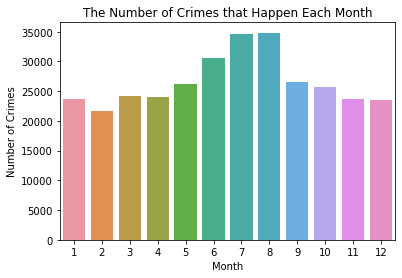

In [4]:
sns.barplot(x = df.index, y = df.MONTH, data = df)
plt.title('The Number of Crimes that Happen Each Month')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')

In [5]:
# do lineplot for what type of crime and when it happened to see if there is more of a certain crime at a certain time

In [6]:
# make new table with each type of offense as a column but what should be the rows?
# the line plot should have months as the x axis and the number of times the crime happened as the y axis

In [25]:
grouped = crimes.groupby(crimes.OFFENSE_CODE_GROUP)
vandalism = grouped.get_group("Vandalism")
vandalism = vandalism.sort_values('MONTH', ascending = True)
vand_num = vandalism.groupby('MONTH').MONTH.count()
#vand_num

grouped = crimes.groupby(crimes.OFFENSE_CODE_GROUP)
mvar = grouped.get_group("Motor Vehicle Accident Response")
mvar = mvar.sort_values('MONTH', ascending = True)
mvar_num = mvar.groupby('MONTH').MONTH.count()
mvar_num


MONTH
1     2746
2     2534
3     2909
4     2738
5     3030
6     3535
7     3841
8     3980
9     3043
10    3092
11    2711
12    2973
Name: MONTH, dtype: int64

In [26]:
sns.lineplot(data = vand_num)

SyntaxError: positional argument follows keyword argument (<ipython-input-26-03d1650813cf>, line 1)

In [8]:
# do heat map for districts and type of crime to see what crime is most common in each area

In [9]:
data = [crimes["OFFENSE_CODE_GROUP"], crimes["DISTRICT"]]
headers = ["group", "district"]
df3 = pd.concat(data, keys=headers)
df3
#sns.heatmap()

group     0                      Larceny
          1                    Vandalism
          2                        Towed
          3         Investigate Property
          4         Investigate Property
                            ...         
district  319068                      D4
          319069                     E18
          319070                     E18
          319071                     E13
          319072                      D4
Length: 638146, dtype: object